# COVID 19
1. Time Series Analysis
2. Graph of Line: (x,y)~(day, #cases)
3. Graph against stock data. (need another dataset).

4. Try scatter plot with x,y being coordinates...

In [1]:
import pandas as pd
import sklearn

import numpy as np

import matplotlib.pyplot as plt
import re
import random

import seaborn as sns; sns.set()
from math import pi


### Try graphing as a fctn

In [10]:
def genral_viz(url):
    cases = pd.read_csv(url, error_bad_lines=False)

    cases = cases.set_index('Country/Region') # set index to country
    cases = cases.drop(['Province/State'], axis=1) # drop column that is rarely used
    
    plt.scatter(x=cases['Long'], y=cases['Lat'])

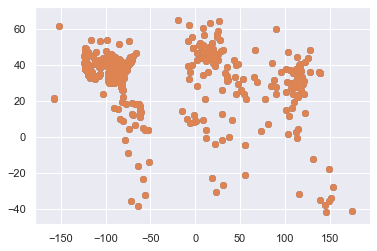

In [13]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

genral_viz(confirmed_url)
genral_viz(deaths_url)

In [115]:
# https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
# MTS: multivariate time series
# MTS is like univariate time series with multiple, dependent variables.
# This practice assumes that countries' have dependent infection rates. This assumption deteriorates with travel bans.
# I will be ignoring that deterioration... to keep my head on. 

total_confirmed = pd.read_csv(confirmed_url, error_bad_lines=False)

total_confirmed = total_confirmed.set_index('Country/Region') # set index to country
total_confirmed = total_confirmed.drop(['Province/State'], axis=1) # drop column that is rarely used
total_confirmed = total_confirmed.groupby(by=total_confirmed.index, axis=0).sum()
total_confirmed = total_confirmed.drop(['Lat','Long'], axis=1) #drop coordinates
total_confirmed = total_confirmed.sort_values(by=total_confirmed.columns[-1], ascending = False) # sort by most recent cases
del total_confirmed.index.name
total_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977
Italy,0,0,0,0,0,0,0,0,0,2,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157
Iran,0,0,0,0,0,0,0,0,0,0,...,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086
Spain,0,0,0,0,0,0,0,0,0,0,...,259,400,500,673,1073,1695,2277,2277,5232,6391


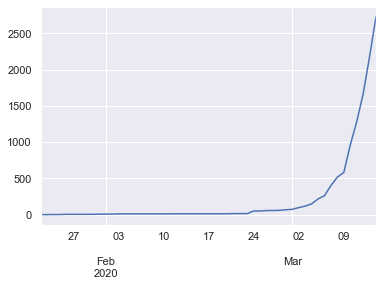

In [122]:
# multivariate time series DF. transpose the matrix.
mts_confirmed = total_confirmed.T # transpose matrix

mts_confirmed.index = pd.to_datetime(mts_confirmed.index , infer_datetime_format=True) # changes index to datetime format

mts_confirmed.US.plot()

In [94]:
#creating the train and validation set
train = mts_confirmed[:int(0.8*(len(mts_confirmed)))]
valid = mts_confirmed[int(0.8*(len(mts_confirmed))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\mkorn\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mkorn\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [84]:
model = VAR(endog=mts_confirmed)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[ 6.73118451e+04  2.46830507e+04  1.30641086e+04  8.47980697e+03
   7.41303773e+03  5.34393782e+03  4.91098806e+03  1.49964573e+03
   1.18802467e+03  8.85797942e+02  1.04074316e+03  1.36129374e+03
   1.05538539e+03  9.61432491e+02  9.56325329e+02  1.00771487e+03
   1.14627112e+03  9.58230348e+02  7.09090533e+02  5.20361637e+02
   1.01666020e+02  1.33572661e+02  8.24631956e+02  7.51714457e+02
   6.87854030e+02  5.76294344e+02  3.18562398e+02  5.02578856e+02
   4.02444794e+02  6.51970667e+02  4.75155656e+02  3.79555861e+02
   2.29186000e+02  3.42557556e+02  3.64290665e+02  2.40705417e+02
   2.58616613e+02  2.56218690e+02  1.93748428e+02  2.71513827e+02
   2.82158289e+02  1.77511707e+02  2.68743940e+02  1.93862028e+02
   2.10172216e+02  1.97086737e+02  1.80983681e+02  2.09803001e+02
   1.30128435e+02  1.59680694e+02  1.74805901e+02  2.97066899e+02
   2.53452300e+02  5.43656577e+01  1.62331461e+02  1.67017194e+02
   1.39122608e+02  1.43447686e+02  9.35808812e+01  1.52107356e+02
   1.37756

C:\Users\mkorn\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mkorn\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [103]:
mts_confirmed = mts_confirmed.groupby(by=mts_confirmed.columns, axis=1).sum()
mts_confirmed.head()

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [7]:

#this block of code was not working because imports were taking too long

# import sys
# !conda install --yes --prefix {sys.prefix} shapely
# from shapely.geometry import Point

# !conda install --yes --prefix {sys.prefix} geopandas
# import geopandas as gpd
# from geopandas import GeoDataFrame


# geometry = [Point(xy) for xy in zip(total_confirmed['Long'], total_confirmed['Lat'])]
# gdf = GeoDataFrame(total_confirmed, geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);